# Jaxson Bos

## Do autonomous and human operated vehicles have the same machanism of fatality?

For my research question I want to focus on whether the autonomous vehicle crash mechanism is different from the United States human operated vehicle crashes. I think in order to do this I will compile data that is specific to how the crashes happened and what vehicles are involved. I will also look at where the crashes happened on the road to see if this leads to any patterns in the human driving vs what the tesla vehicles are crashing into.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', FutureWarning)

sns.set_theme(style="whitegrid",
              font_scale=1.3, # This makes the fonts larger
              )

In [3]:
# Load File
dataset1 = pd.read_csv("../data/raw/Tesla_Deaths.csv")
dataset1.head(n=10)

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN
5,289.0,2022.0,12/18/2022,USA,CA,Tesla hit two other cars,1.0,-,1,-,...,-,-,https://web.archive.org/web/20221213060612/ht...,https://web.archive.org/web/20221219025408/ht...,https://web.archive.org/web/20221219025408/ht...,NaN,NaN,NaN,NaN,NaN
6,288.0,2022.0,12/17/2022,USA,CA,Tesla hits pedestrian on highway,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221213060612/ht...,https://web.archive.org/web/20221220054727/ht...,https://web.archive.org/web/20221220054727/ht...,NaN,NaN,NaN,NaN,NaN
7,287.0,2022.0,12/11/2022,USA,CA,Tesla crashes into wall,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221213060612/ht...,https://web.archive.org/web/20221213060612/ht...,https://web.archive.org/web/20221213060612/ht...,NaN,Clarissa Lewis,NaN,NaN,NaN
8,286.0,2022.0,12/11/2022,USA,MO,Collision at intersection,1.0,-,-,1,...,-,-,https://www.ky3.com/2022/12/04/springfield-po...,https://www.ky3.com/2022/12/04/springfield-po...,https://www.ky3.com/2022/12/04/springfield-po...,NaN,Rita Deckard,NaN,NaN,NaN
9,285.0,2022.0,12/6/2022,Canada,-,"Tesla veers, collides with truck",1.0,1,-,-,...,-,-,https://web.archive.org/web/20221201065037/ht...,https://www.tvanouvelles.ca/2022/12/05/une-fe...,https://www.tvanouvelles.ca/2022/12/05/une-fe...,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset2 = pd.read_csv("../data/raw/US_car_crashes.csv")
dataset2.head(n=10)

,State,Atmospheric Condition,Crash Date,Fatalities in crash,Roadway,Age,Alcohol Results,Person Type,Drug Involvement,Race,Gender,Injury Severity,Crash Date.year,Crash Date.month,Crash Date.day-of-month,Crash Date.day-of-week
0,Alaska,Clear,2011-01-05,1,Rural-Principal Arterial-Interstate,27.0,0.00,Driver of a Motor Vehicle In-Transport,Yes,NaN,Male,Non-incapacitating Evident Injury (B),2011,1,5,3
1,Alaska,Clear,2011-01-05,1,Rural-Principal Arterial-Interstate,60.0,0.00,Driver of a Motor Vehicle In-Transport,No,White,Female,Fatal Injury (K),2011,1,5,3
2,Arizona,Clear,2011-01-01,1,Urban-Other Principal Arterial,24.0,NaN,Passenger of a Motor Vehicle In-Transport,Not Reported,NaN,Female,No Injury (O),2011,1,1,6
3,Arizona,Clear,2011-01-01,1,Urban-Other Principal Arterial,27.0,0.00,Driver of a Motor Vehicle In-Transport,No,NaN,Male,No Injury (O),2011,1,1,6
4,Arizona,Clear,2011-01-01,1,Urban-Other Principal Arterial,82.0,0.00,Pedestrian,No,Unknown,Female,Fatal Injury (K),2011,1,1,6
5,Arkansas,Clear,2011-01-02,1,Rural-Minor Arterial,40.0,0.00,Driver of a Motor Vehicle In-Transport,Not Reported,White,Male,Fatal Injury (K),2011,1,2,7
6,Colorado,Clear,2011-01-02,1,Rural-Local Road or Street,17.0,0.00,Driver of a Motor Vehicle In-Transport,No,White,Female,Fatal Injury (K),2011,1,2,7
7,Connecticut,Clear,2011-01-01,1,Urban-Local Road or Street,22.0,0.21,Driver of a Motor Vehicle In-Transport,Not Reported,White,Male,Fatal Injury (K),2011,1,1,6
8,Delaware,Cloudy,2011-01-04,1,Urban-Other Principal Arterial,4.0,NaN,Passenger of a Motor Vehicle In-Transport,Not Reported,NaN,Female,Non-incapacitating Evident Injury (B),2011,1,4,2
9,Delaware,Cloudy,2011-01-04,1,Urban-Other Principal Arterial,20.0,0.21,Driver of a Motor Vehicle In-Transport,Yes,White,Male,Fatal Injury (K),2011,1,4,2


## Milestone 3

### 1. Summary of the dataset
The describe().T function helps us to explore the dataset in its raw numbers

In [5]:
df = pd.read_csv("../data/raw/Tesla_Deaths.csv")

summary = df.describe().T
print(summary)

              count         mean         std    min      25%     50%      75%  \
Case #        294.0   147.500000   85.014705    1.0    74.25   147.5   220.75   
Year          294.0  2013.850340  106.050207  202.0  2019.00  2021.0  2022.00   
 Deaths       299.0    10.284281  119.032014    1.0     1.00     1.0     1.00   
 Deceased 4     0.0          NaN         NaN    NaN      NaN     NaN      NaN   

                 max  
Case #         294.0  
Year          2022.0  
 Deaths       2013.0  
 Deceased 4      NaN  


In [7]:
df = pd.read_csv("../data/raw/US_car_crashes.csv")

summary = df.describe().T
print(summary)

                          count         mean        std     min     25%  \
Fatalities in crash      4999.0     1.138628   0.425039     1.0     1.0   
Age                      4929.0    38.608237  20.305162     0.0    22.0   
Alcohol Results          2293.0     0.058696   0.095707     0.0     0.0   
Crash Date.year          4999.0  2011.000000   0.000000  2011.0  2011.0   
Crash Date.month         4999.0     2.508702   2.201048     1.0     1.0   
Crash Date.day-of-month  4999.0    13.647930   8.802106     1.0     6.0   
Crash Date.day-of-week   4999.0     4.245849   2.011116     1.0     2.0   

                            50%      75%      max  
Fatalities in crash         1.0     1.00     5.00  
Age                        36.0    53.00    98.00  
Alcohol Results             0.0     0.12     0.65  
Crash Date.year          2011.0  2011.00  2011.00  
Crash Date.month            2.0     3.00    12.00  
Crash Date.day-of-month    13.0    21.00    31.00  
Crash Date.day-of-week      4.0    

### 2. Next we will want to drop some columns that may be unnecessary when looking at the research questions
This task will let me drop the columns not needed for the research (Date, Year, State, Unamed: 16, Unamed: 17, Source, Note, Deceased 1 through 4) while creating a new data set named "Dataset_new1"

In [20]:
##Cleaned up Tesla dataset

df = pd.read_csv('../data/raw/Tesla_Deaths.csv')

df.drop(['Date', 'Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ', ' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 ', 
         ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO '], axis=1, inplace=True)
df.drop([294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306], axis=0, inplace=True)
dataset_new1 = df
print(dataset_new1)

     Case #    Year  Country   State                         Description   \
0     294.0  2022.0      USA       CA    Tesla crashes into back of semi    
1     293.0  2022.0   Canada        -                      Tesla crashes    
2     292.0  2022.0      USA       WA   Tesla hits pole, catches on fire    
3     291.0  2022.0      USA       GA            Tesla crashes and burns    
4     290.0  2022.0   Canada        -      Tesla crashes into storefront    
..      ...     ...       ...     ...                                 ...   
289     5.0  2014.0      USA      CA            Tesla kills motorcyclist    
290     4.0  2014.0      USA      CA          Thief crashes stolen Tesla    
291     3.0  2014.0      USA      CA         Tesla rear ends stopped car    
292     2.0  2013.0      USA      CA                 Tesla kills cyclist    
293     1.0  2013.0      USA      CA      Tesla veers into opposite lane    

      Deaths   Tesla driver   Tesla occupant   Other vehicle   \
0         

In [19]:
## Cleaned up US car crash dataset

df = pd.read_csv('../data/raw/Us_car_crashes.csv')

df.drop(['Race', 'Alcohol Results', 'Drug Involvement', 'Gender', 'Crash Date.year',
       'Crash Date.month', 'Crash Date.day-of-month',
       'Crash Date.day-of-week'], axis=1, inplace=True)
dataset_new2 = df
print(dataset_new2)

               State Atmospheric Condition  Crash Date  Fatalities in crash  \
0             Alaska                 Clear  2011-01-05                    1   
1             Alaska                 Clear  2011-01-05                    1   
2            Arizona                 Clear  2011-01-01                    1   
3            Arizona                 Clear  2011-01-01                    1   
4            Arizona                 Clear  2011-01-01                    1   
...              ...                   ...         ...                  ...   
4994      New Jersey                 Clear  2011-01-31                    1   
4995        New York                  Snow  2011-01-21                    1   
4996  North Carolina                 Clear  2011-01-16                    1   
4997    North Dakota                 Clear  2011-08-27                    1   
4998            Ohio                  Rain  2011-03-05                    1   

                                  Roadway   Age  \


In [52]:
## Cleaned up US car crash dataset

df = pd.read_csv('../data/raw/Us_car_crashes.csv')

df.drop(['Race', 'Alcohol Results', 'Drug Involvement', 'Gender', 'Crash Date.year',
       'Crash Date.month', 'Crash Date.day-of-month',
       'Crash Date.day-of-week'], axis=1, inplace=True)
df = df.drop(df[df['Person Type'].isin(['Unknown', 'Other', 'Not Reported'])].index)
dataset_new2 = df
print(dataset_new2)

               State Atmospheric Condition  Crash Date  Fatalities in crash  \
0             Alaska                 Clear  2011-01-05                    1   
1             Alaska                 Clear  2011-01-05                    1   
2            Arizona                 Clear  2011-01-01                    1   
3            Arizona                 Clear  2011-01-01                    1   
4            Arizona                 Clear  2011-01-01                    1   
...              ...                   ...         ...                  ...   
4994      New Jersey                 Clear  2011-01-31                    1   
4995        New York                  Snow  2011-01-21                    1   
4996  North Carolina                 Clear  2011-01-16                    1   
4997    North Dakota                 Clear  2011-08-27                    1   
4998            Ohio                  Rain  2011-03-05                    1   

                                  Roadway   Age  \


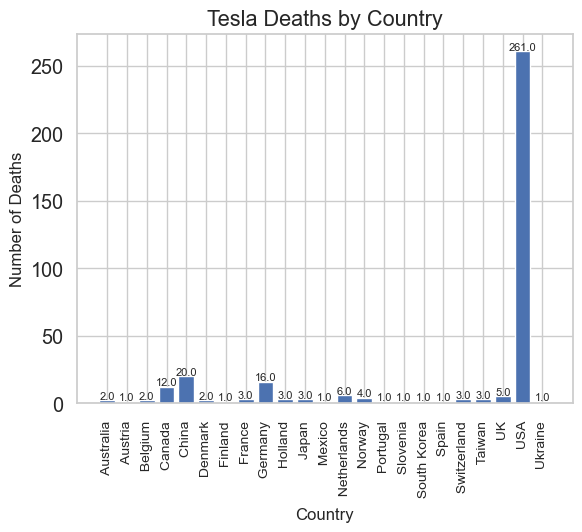

In [97]:
df = pd.read_csv("../data/raw/Tesla_Deaths.csv")

country_deaths = df.groupby(' Country ')[' Deaths '].sum()

plt.bar(country_deaths.index, country_deaths.values)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.title('Tesla Deaths by Country')

plt.xticks(rotation=90, fontsize=10)

for i, v in enumerate(country_deaths.values):
    plt.text(i, v + 1, str(v), ha='center', fontsize = 8)
    
plt.show()

Observation: Most of the automated tesla crashes occur in the USA which helps us explain the difference between our two datasets.

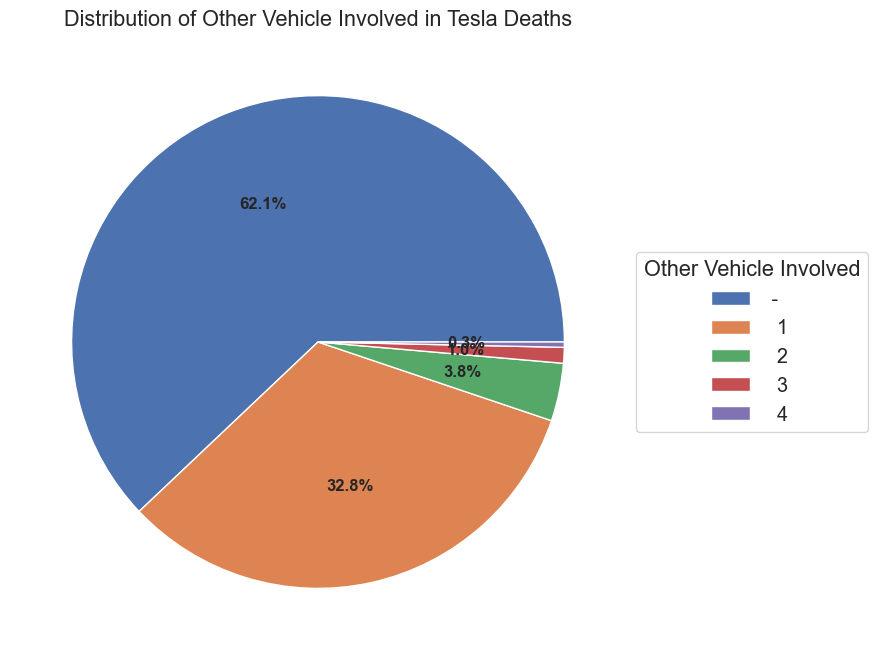

In [92]:
df = pd.read_csv('../data/raw/Tesla_Deaths.csv')

df.drop(['Date', 'Year', 'Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ', ' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 ', 
         ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO '], axis=1, inplace=True)
df.drop([294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306], axis=0, inplace=True)

other_vehicle_counts = df[' Other vehicle '].value_counts()

fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(other_vehicle_counts.values, autopct='%1.1f%%', textprops={'fontsize': 12})
ax.legend(wedges, other_vehicle_counts.index, title="Other Vehicle Involved", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
plt.title("Distribution of Other Vehicle Involved in Tesla Deaths")
plt.show()


Observation: The tesla vehicles are mostly crashing on their own into inatimate objects which means that the crashes are caused compeletely by the autonomous vehicle computing.

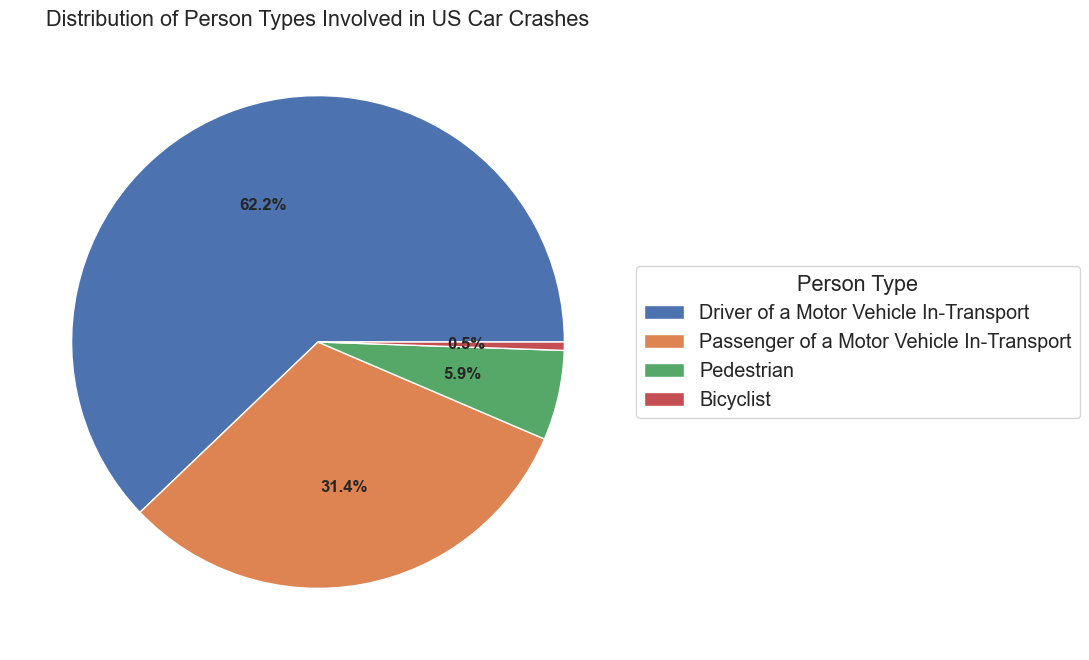

In [95]:
df = pd.read_csv('../data/raw/US_car_crashes.csv')
df = df.drop(df[df['Person Type'].isin(['Unknown Occupant Type in a Motor Vehicle In- Transport', 'Persons on Personal Conveyances', 
                                        'Persons In/On Buildings', 'Occupant of a Motor Vehicle Not In- Transport', 
                                        'Occupant of a Non-Motor Vehicle Transport Device'])].index)

person_type_counts = df['Person Type'].value_counts()

fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(person_type_counts.values, autopct='%1.1f%%', textprops={'fontsize': 12})
ax.legend(wedges, person_type_counts.index, title="Person Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
plt.title("Distribution of Person Types Involved in US Car Crashes")
plt.show()

Observation: This pie graph explains the amount of people involved in the US car crashes, but more importantly shows that all of these recorded crashes are involving at least one other vehicle or person

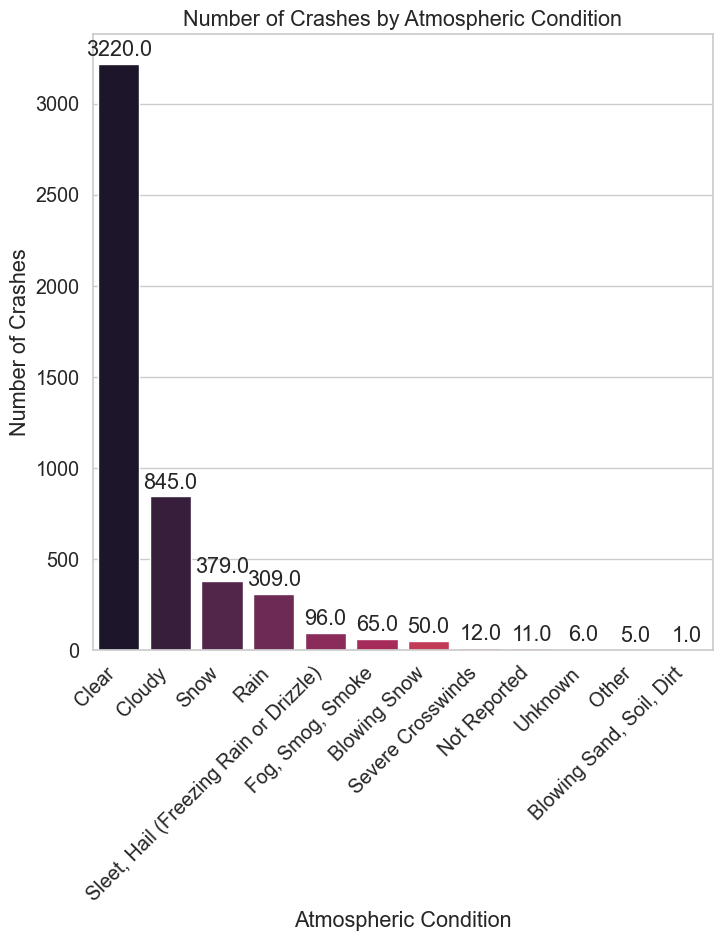

In [98]:
df = pd.read_csv('../data/raw/Us_car_crashes.csv')

df.drop(['Race', 'Alcohol Results', 'Drug Involvement', 'Gender', 'Crash Date.year',
       'Crash Date.month', 'Crash Date.day-of-month',
       'Crash Date.day-of-week'], axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(8,8))
ax = sns.countplot(x='Atmospheric Condition', data=df, order=df['Atmospheric Condition'].value_counts().index, palette='rocket')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Number of Crashes by Atmospheric Condition')
plt.xlabel('Atmospheric Condition')
plt.ylabel('Number of Crashes')

plt.show()

Observation: Since the US car crashes involve many different weather and atmospheric conditions it shows that there is more to the car crashes than just human error. It helps to explain the deeper mechanism or the crashes where the autonomous vehicles still are only reliant on the computing system.

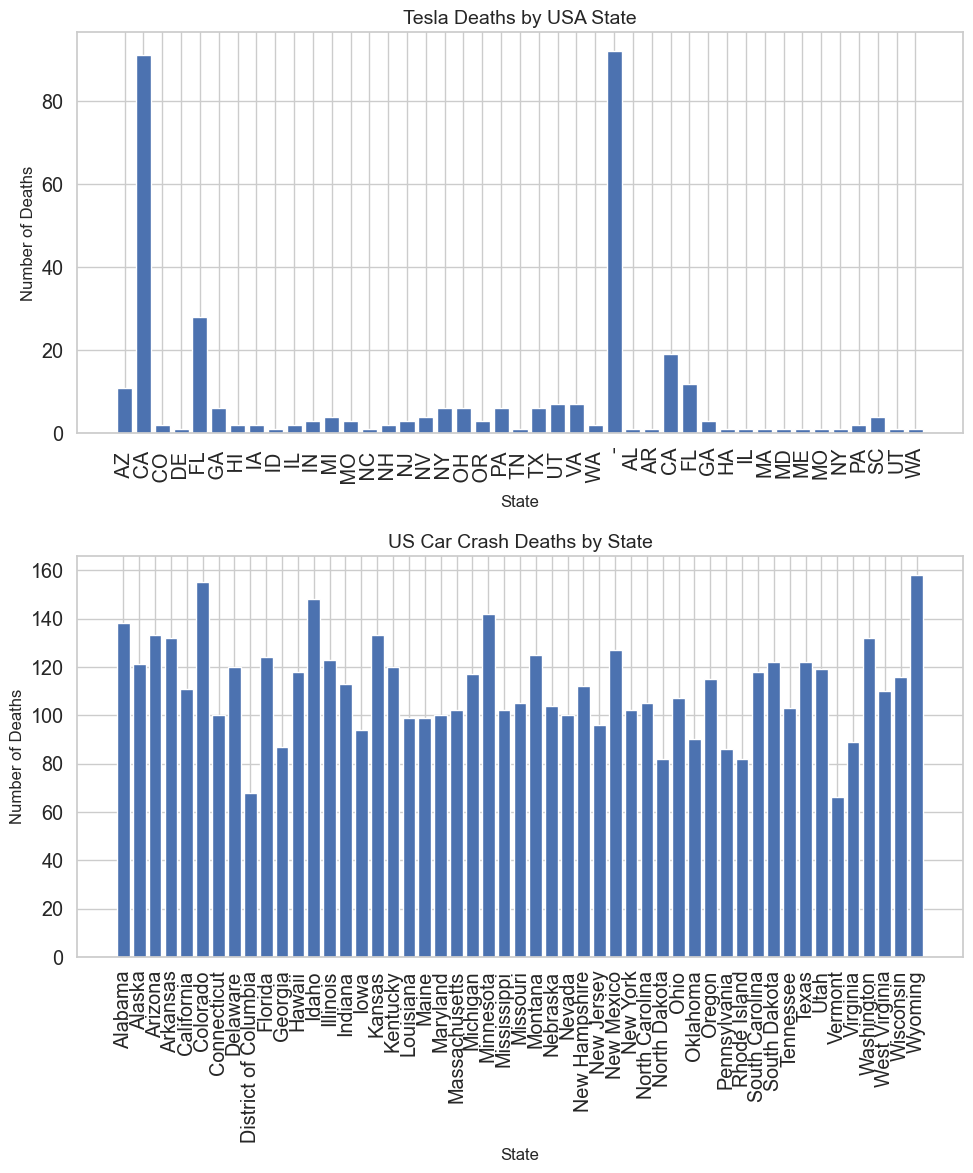

In [26]:
# Load the datasets
tesla_df = pd.read_csv("../data/raw/Tesla_Deaths.csv")
us_crash_df = pd.read_csv("../data/raw/US_car_crashes.csv")

# Calculate the total number of Tesla deaths per country
tesla_country_deaths = tesla_df.groupby(' State ')[' Deaths '].sum()

# Calculate the total number of US car crash deaths per year
us_crash_yearly_deaths = us_crash_df.groupby('State')['Fatalities in crash'].sum()

# Create two separate subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,12))

# Plot the first graph
ax1.bar(tesla_country_deaths.index, tesla_country_deaths.values, label='Tesla Deaths')
ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Number of Deaths', fontsize=12)
ax1.set_title('Tesla Deaths by USA State', fontsize=14)
ax1.tick_params(axis='x', labelrotation=90)

# Plot the second graph
ax2.bar(us_crash_yearly_deaths.index, us_crash_yearly_deaths.values, label='US Car Crash Deaths')
ax2.set_xlabel('State', fontsize=12)
ax2.set_ylabel('Number of Deaths', fontsize=12)
ax2.set_title('US Car Crash Deaths by State', fontsize=14)
ax2.tick_params(axis='x', labelrotation=90)

# Display the graphs
plt.tight_layout()
plt.show()


Observation: This double graph helps to show how tesla crashes are predominatly in California where human operated crashes are all over USA, this could show that the human operated vehicles are completely random in their accidents where the autonomous crashes may follow a pattern or common theme.

## Milestone 3 EDA and their explanation

In this milestone I have explored the dataset further by creating visuals of the certain aspects that will help answer the research questions present. In order to redifine my research questions further I will be looking at the specific causes of the crashes and if the automation of the tesla cars can help to prevent or avoid these issues. On the other side I will also be looking at the reasons that crashes may be more avoidable with human operation.

What was observed:

The first visual that is being shown is taken from the Tesla Deaths data set and it explains how mostly all of the autonomous vehicle crashes that happened from 2013 to 2023 occur in the USA, with less than a quarter occuing outside the USA. This is a great starting point for my research questions as it explains the reason for comparing the data to the US car crash dataset. The comparison will give a basis to the other research questions as they all now can explain how the autonomous vs human operated crashes compare mostly within the USA.

The second and third pie graphs show the mechanism of the crashes for both the autonomous vehicle crashes from Tesla as well as the human operated vehicle crashes within the US. The first pie graph is showing whether there are more than one vehicles involved in the autonomous vehicle crashes. This has helped us to realize that the crashes with the teslas are mostly occuring amongst themselves and not actually crashing into other vehicles. This leads us into the second pie graph which shows the distribution of people involved in the US car crashes. This information is useful because it helps to show the oposite of the tesla vehicle crashes. This pie chart explains that the human operated vehicle accidents are dependent on two or more vehicles crashing into each other. These two graphs when looked at together explain how the tesla vehicles are making the mistakes themselves by completely taking the human factor out of the picture, while the normal human operated accidents always involve two or more people.

The last graph revolving around theatmospheric conditions during the crashes is important in the battle between autonomous and human operated vehicles. This graphic is important because it shows that the human operated crashes have multiple factors that can alter the accident. Although the clear atmoshpoeric condition is the most predominant value all of the other conditions make up around a third of the crashes showing there is more than just human error in these crashes.

## Conclusion

In Conclusion to answer my research question of whether or not the autonomous and human operated vehicles have the same mechanism or crashes I needed to dive deeper into the different outside factors. Since the autonomous vehicles had 63% of their crashes occur without another vehicle at the scene it is fair to establish that the modality of those crashes was mostly due to the computing of the autonomous vehicles and not human interferance. This points towards the autonomous vehicles being the problem and not that of human error.

On the other hand the human operated vehicle crashes show many different reasons that the crash could have occured. Some of these reasons explored being the type of people involved as well as the weather conditions that were present during the crash. With the human error being so variant and the conditions of the crash being very different as well, it shows that the human operation isnt solely the problem. All in all, it is hard to completely establish whether or not the human error or the computer error is the problem with these crashes but we are able to establish that the autonomous crashes are mostly due to the computing errors and not outside human interference.